### Implementing K Means Clustering from scratch

#### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
np.random.seed(0)

#### Generating a random cluster ,X=cluster points, y=cluster labels

In [3]:
X, y = make_blobs(n_samples=1500, centers=3,n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

In [4]:
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

In [5]:
# This is the labels provided by scikit-learn and serves as the ground truth for comparison.
y
# These labels will not be known to us in practice. This is just for us to cross verify our clustering in later stages.

array([2, 2, 1, ..., 1, 0, 2])

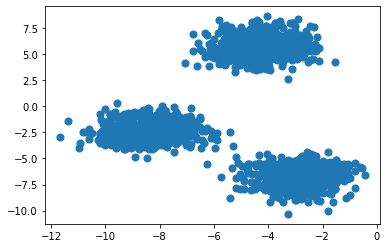

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

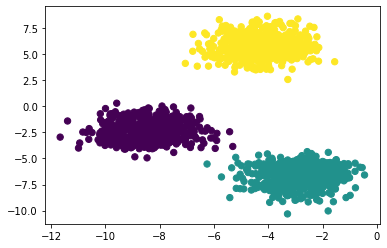

In [7]:
# plotting the points with correct cluster labels
plt.scatter(X[:,0],X[:,1],c=y,s=40)

#### By visualizing the ground truth, I have a baseline that provides a relative metric for algorithm accuracy

##### Now implementing the algorithm & Using scipy to calculate euclidean distances efficiently

In [8]:
from scipy.spatial.distance import cdist

In [9]:
def k_means(X,K):
    # keep track of history to see it in action
    centroids_history=[]
    labels_history=[]
    rand_index=np.random.choice(X.shape[0],K)
    centroids=X[rand_index]
    centroids_history.append(centroids)
    while True:
        # Euclidean distance is calculated for each point relative to centroid and np.argmin return index
        # location of minimal distance - to which cluster a point is assigned to
        labels=np.argmin(cdist(X,centroids),axis=1)
        labels_history.append(labels)
        # Take mean of points within cluster to find new centroid
        new_centroids=np.array([X[labels==i].mean(axis=0) for i in range(K)])
        centroids_history.append(new_centroids)
        # If old and new centroids are not changing i.e same so k-means is complete else continue
        if np.all(centroids==new_centroids):
            break
        centroids=new_centroids
    return centroids,labels,centroids_history,labels_history

In [10]:
centers,labels,center_hist,label_hist=k_means(X,3)

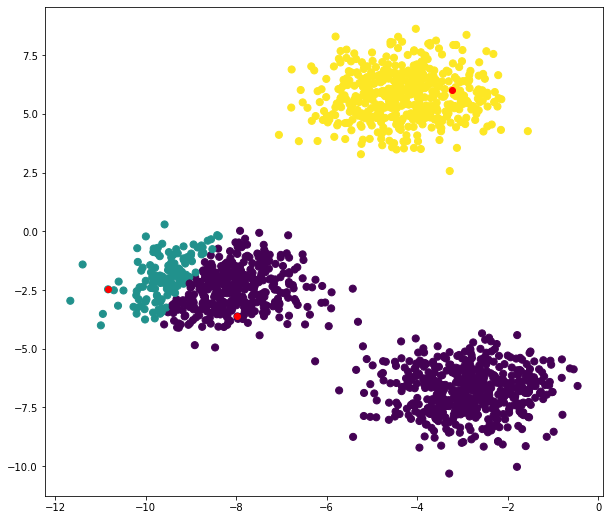

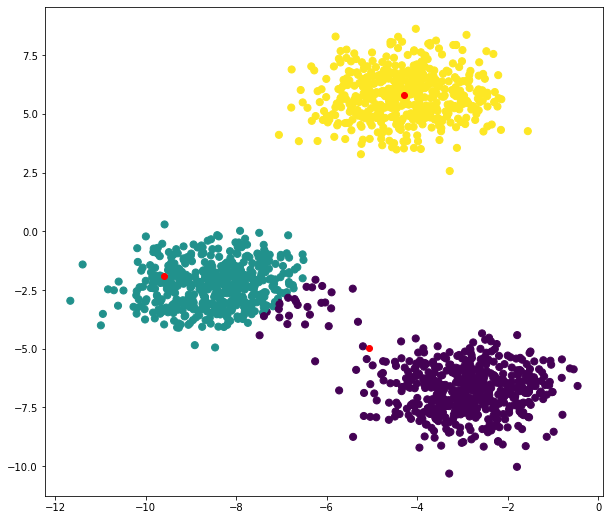

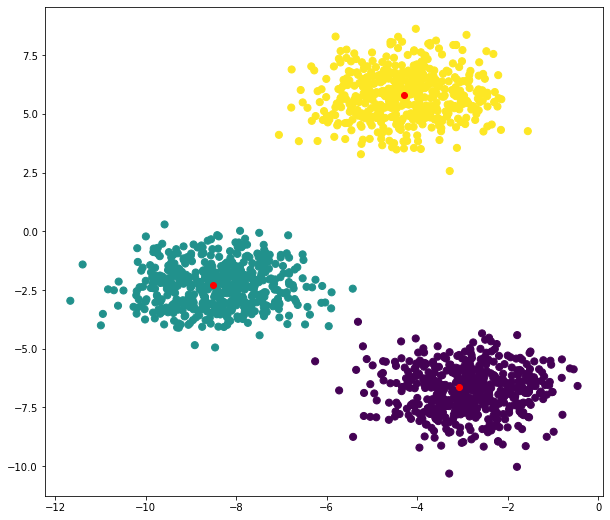

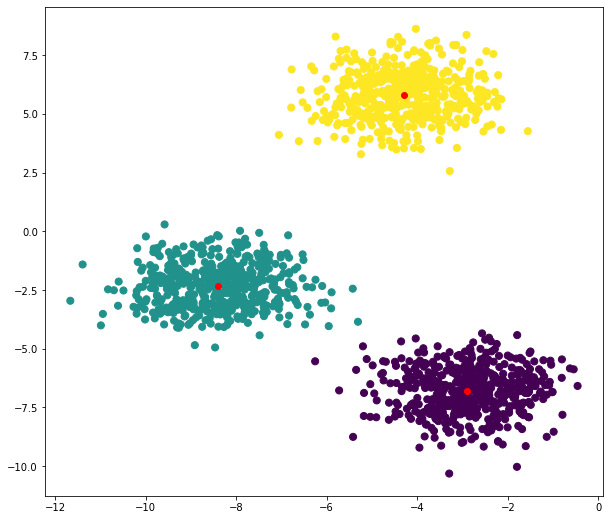

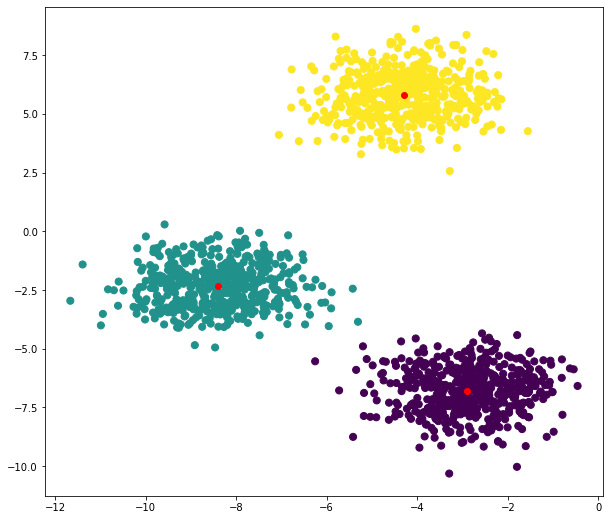

In [11]:
history=zip(center_hist,label_hist)
for x,y in history:
    plt.figure(figsize=(10,9))
    plt.scatter(X[:, 0], X[:, 1], c=y,s=50)
    plt.scatter(x[:, 0], x[:, 1], c='red')    
    plt.show()

##### As it can be seen in previous graphs, its an iterative algorithm which based on distamce, makes optimal clusters. It starts with random initialization of centroids and finds the clusters based on data complexity

### Understanding Cluster performance: Silhouette Score

##### Its a difficult task to evaluate unsupervised algorithms as there is no ground truth available so we use Silhouette score. It finds the optimal K numbers of clusters for unsupervised learning approach. It works by analyzing how well a point fits in a cluster & ranges from -1 to 1. If its average value across the algo is 1: perfect clusters & minimal confusion about which point belongs where. Its very rare though unless we have made data ourselves.If silhouette score is positive it means ,a point is closer to assigned cluster than neighboring cluster, if its zero then point lies on boundary of assigned cluster and next closest cluster & if its negative ,it means its assigned to wrong cluster.

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhouette_score(X,labels)

0.7695989596010836